# Pymaceuticals Inc.
---

### Analysis
Based on the various visualizations and analyses from the data, here are four key observations:

1. Gender Distribution: Based on the pie chart, the distribution between male and female mice are somewhat equal, for the study shows 50.4% being male and 49.6% are female. Overall, this study does not interfere in a gender-relation factor and ensures both genders are similarly represented in the study.

2. Capomulin and Ramicane lower tumor volume: The drug in the dataset shows that the other treatments are not as effective as Capomulin and Ramicane regimens at reducing tumor growth. They both developed a lower mean and median tumor volume of around 40 mm³ which may have a potential further study.

3. Results for Capomulin and Ramicane Treatment Regimes: According to the summary statistics as the box plots demonstrates other drugs such as Infubinol and Ceftamin appears to have higher tumor volumes compared to Capomulin and Ramicane treatment regimes. This states that Capomulin and Ramicane regimes are more likely to decrease tumor growth in mice.

4. Mice Weight VS Tumor Volume: The mouse’s weight and tumor volume for the Capomulin, as shown in the scatter plot and linear regression analysis, is showing a positive correlation. This concludes that the heavier the mice are the bigger the tumor volume. However, further investigation should be done in order to imply causality.


 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Used this website to help me locate duplicate values https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

duplicate_mice_id = combined_mouse_df[combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mice_id["Mouse ID"].unique()



array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_df = pd.DataFrame(combined_mouse_df.loc[combined_mouse_df['Mouse ID'] == 'g989',:])
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = pd.DataFrame(combined_mouse_df.loc[combined_mouse_df['Mouse ID'] != 'g989',:])
clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
#Used this website to do groupby 'Drug Regimen' and getting the mean for 'Tumor Volume (mm3)' https://pandas.pydata.org/pandas-docs/version/1.2/reference/api/pandas.core.groupby.GroupBy.mean.html

mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
    "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": standard_deviation,
    "Tumor Volume Std. Err.": sem})
    
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#Used this website to get to know how to use the aggregation method and get result in one line of code https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html

summary_statistics_agg = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

#Used this link to know how to add a title https://stackoverflow.com/questions/57958432/how-to-add-table-title-in-python-preferably-with-pandas
summary_statistics_agg =  summary_statistics_agg.style.set_caption("Tumor Volume (mm3)")
summary_statistics_agg


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

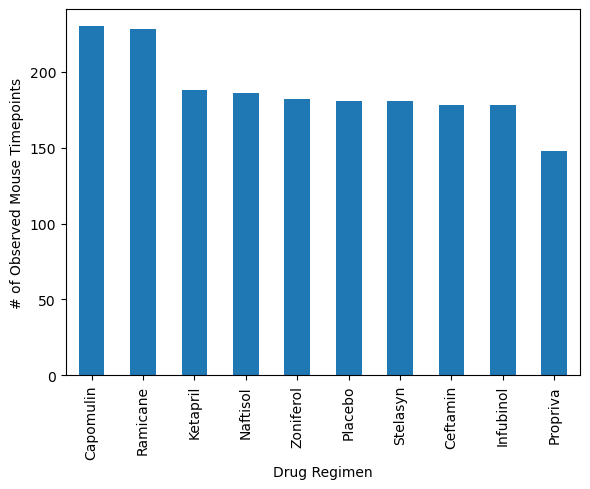

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Grouped the cleaned data by the "Drug Regimen" column
drug_regimen_type = clean_mouse_df.groupby("Drug Regimen")

#Counting the number of occurrences (mouse timepoints) for each drug regimen
count_drug_regimen_type = drug_regimen_type['Drug Regimen'].count()

#Sorting the counted drug regimen types in descending order
sort_drug_regimen_type = count_drug_regimen_type.sort_values(ascending=False)

#Creating a bar chart of the sorted drug regimen types with specified figure size
drug_regimen_type_chart = sort_drug_regimen_type.plot(kind='bar', figsize=(6,5))

#Giving the chart some labels
drug_regimen_type_chart.set_xlabel('Drug Regimen')
drug_regimen_type_chart.set_ylabel('# of Observed Mouse Timepoints')

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

#Displaying the chart
plt.show()


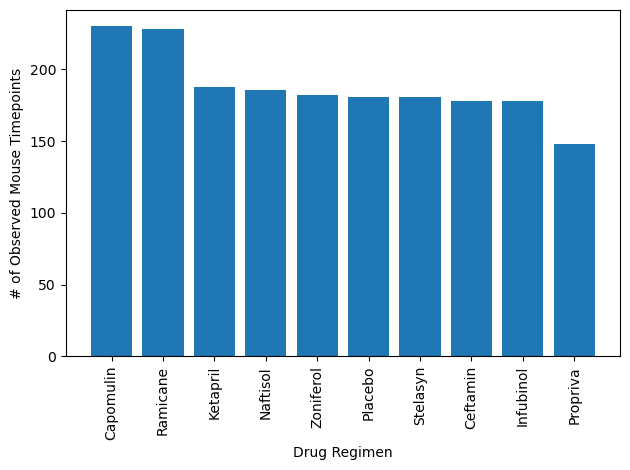

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Counting the number of occurrences (mouse timepoints) for each drug regimen
count_drug_regimen = drug_regimen_type['Drug Regimen'].count()

#Sorting the counted drug regimen types in descending order
sort_drug_regimen = count_drug_regimen.sort_values(ascending=False)

#Setting the x-axis values to the index of the sorted drug regimen data
x_axis = sort_drug_regimen.index

#Setting the y-axis values to the corresponding count values of each drug regimen
y_axis = sort_drug_regimen.values 

#Creating a bar chart using the x_axis (drug regimen names) and y_axis (observation counts)
plt.bar(x_axis, y_axis, align="center")

#Giving the chart some labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Rotating the x-axis labels vertically
plt.xticks(x_axis, rotation="vertical")

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

#Displaying the chart
plt.show()

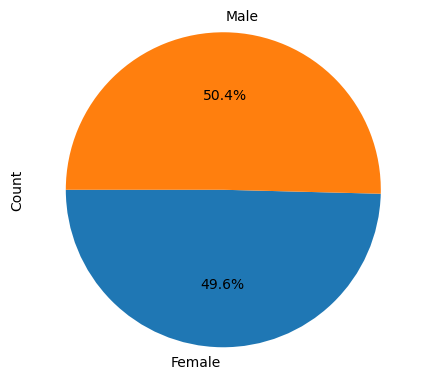

In [48]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
#Used this link to know how to remove duplicate data https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

#Removing duplicate mouse entries based on Mouse ID and Sex columns
unique_mice_gender_df = clean_mouse_df[['Mouse ID', 'Sex']].drop_duplicates()

#Grouping the unique mouse data by the 'Sex' column
grouping_gender_df = unique_mice_gender_df.groupby('Sex')

#Counting the number of unique entries (mice) for each gender group
count_gender_df = grouping_gender_df['Sex'].count()

#Creating a pie chart to visualize the gender distribution of the mice
gender_pie = count_gender_df.plot(kind='pie', autopct='%1.1f%%', startangle=180, figsize=(5,4.5))

#Labeling the y-axis
gender_pie.set_ylabel('Count')

#Ensuring the pie chart is displayed as a circle
plt.axis("equal")

#Displaying the pie chart
plt.show()


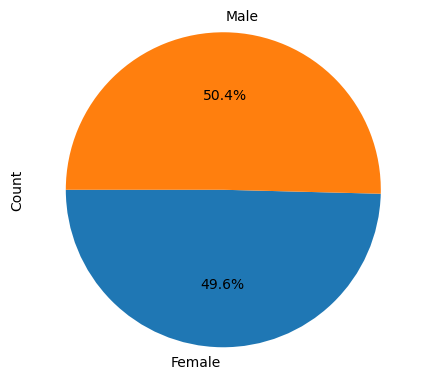

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
#Used this link to know how to remove duplicate data https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

#Removing duplicate mouse entries based on Mouse ID and Sex columns
unique_mice_gender_df = clean_mouse_df[['Mouse ID', 'Sex']].drop_duplicates()

#Grouping the unique mouse data by the 'Sex' column
grouping_gender_df = unique_mice_gender_df.groupby('Sex')

#Counting the number of unique entries (mice) for each gender group
count_gender_df = grouping_gender_df['Sex'].count()

#Extracting the labels (Male/Female) from the index of the count dataframe
labelss = count_gender_df.index

#Extracting the sizes (counts) for each gender group
sizess = count_gender_df.values

#'figsize' defines the size of the pie chart
plt.figure(figsize=(5, 4.5))

#Creating a pie chart using the labels and sizes
plt.pie(sizess,labels=labelss, autopct="%1.1f%%", startangle=180)

#Giving the pie chart some labels
plt.ylabel('Count')

#Ensuring the pie chart is displayed as a circle
plt.axis("equal")

#Displaying the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = clean_mouse_df.groupby("Mouse ID")['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_treatment_df = pd.merge(greatest_timepoints, clean_mouse_df, on=['Mouse ID', 'Timepoint'], how='left')

#Used those two websites to help me know how to use isin() https://pandas.pydata.org/pandas-docs/version/2.1.0/reference/api/pandas.DataFrame.isin.html
#https://stackoverflow.com/questions/14057007/remove-rows-not-isinx
combined_treatments_df = combined_treatment_df[combined_treatment_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])].reset_index()
combined_treatments_df.head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.973419,2,Infubinol,Female,20,23
1,1,a251,45,65.525743,1,Infubinol,Female,21,25
2,3,a275,45,62.999356,3,Ceftamin,Female,20,28
3,6,a411,45,38.407618,1,Ramicane,Male,3,22
4,7,a444,45,43.047543,0,Ramicane,Female,10,25


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in four_treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    four_treatments_data = combined_treatments_df[(combined_treatments_df["Drug Regimen"] == treatment)]["Tumor Volume (mm3)"]
    
    # Add the tumor volumes to the list 
    tumor_volumes.append(four_treatments_data)

    # add subset
    quartiles = four_treatments_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #Identifying any potential outliers in the data
    outliers = four_treatments_data[(four_treatments_data < lower_bound) | (four_treatments_data > upper_bound)]

    #Printing the outliers
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


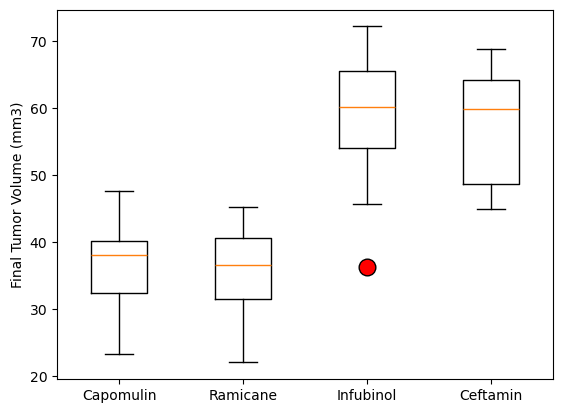

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
#Creating a figure and axis for the box plot using subplots
fig, ax = plt.subplots()

#Generating the box plot for the tumor_volumes data for the four treatments
bp = ax.boxplot(tumor_volumes,labels=four_treatments)

#Setting the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

#Customizing the appearance of the outliers (fliers) in the box plot
plt.setp(bp['fliers'], marker='o', markerfacecolor='r', markersize=12, linestyle='none')

#Displaying the box plot chart
plt.show()

## Line and Scatter Plots

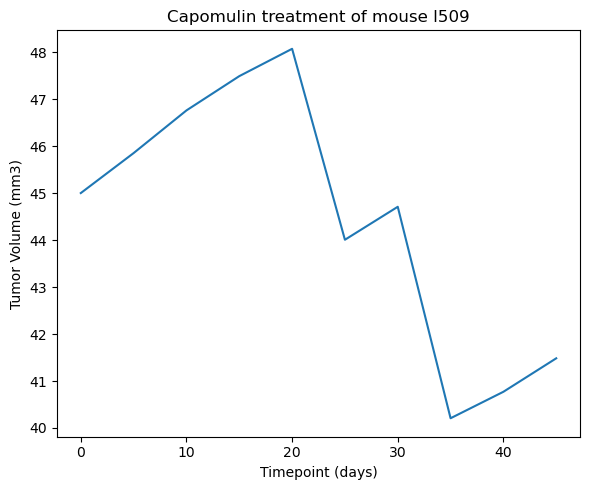

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filtering the data for Capomulin regimen
capomulin_data = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

#Filtering the data to specific mouse
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "l509"]

#Creating the figure for the line plot with a specific size
plt.figure(figsize=(6, 5))

#Ploting tumor volume vs. timepoint
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"])

#Giving the chart some labels
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

#Adjusting the layout of the plot to ensure proper spacing of elements
plt.tight_layout()

#Displaying the chart
plt.show()

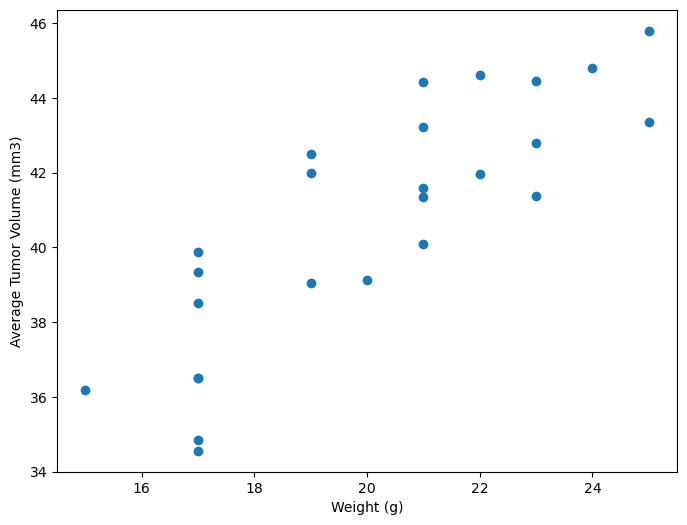

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filtering the data for Capomulin regimen
capomulin_data = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

#Grouping the data by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Merging the average tumor volume data back with the original Capomulin data to get the mouse weight
mouse_weight = capomulin_data.drop_duplicates(subset=['Mouse ID'])[['Mouse ID', 'Weight (g)']]
capomulin_summary = pd.merge(mouse_weight, avg_tumor_volume, on="Mouse ID")

#Creating the figure for the scatter plot with a specific size
plt.figure(figsize=(8, 6))

#Plotting a scatter plot of mouse weight (x-axis) against the average tumor volume (y-axis)
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'])

#Giving the chart some labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Displaying the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


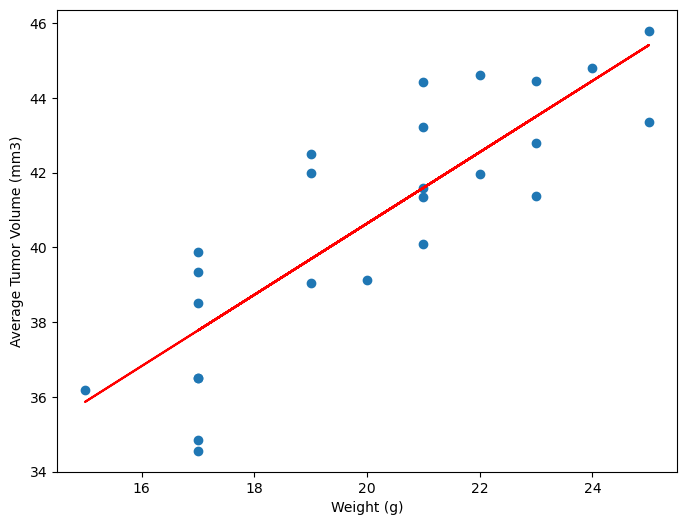

In [68]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Filtering the data for Capomulin regimen
capomulin_data = clean_mouse_df[clean_mouse_df["Drug Regimen"] == "Capomulin"]

#Grouping the data by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Merging the average tumor volume data back with the original Capomulin data to get the mouse weight
mouse_weight = capomulin_data.drop_duplicates(subset=['Mouse ID'])[['Mouse ID', 'Weight (g)']]
capomulin_summary = pd.merge(mouse_weight, avg_tumor_volume, on="Mouse ID")

#Calculating the Pearson correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'])
#Printing the correlation value rounded to 2 decimal places
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Defining the x and y values for the regression plot
x_values = capomulin_summary['Weight (g)']
y_values = capomulin_summary['Tumor Volume (mm3)']


#Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

#Creating a scatter plot and plot the linear regression line
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values)

# Plotting the linear regression line
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, color='r')

#Giving the chart some labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Displaying the plot
plt.show()